In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/'MyDrive'/'Skill Fatory'/'Юнит 2 Разведывательный анализ данных'/project_2/

cacao_flavors.csv  Project_2.ipynb  Project_2_preparing  stud_math.csv


In [4]:
!cp /content/drive/'MyDrive'/'Skill Fatory'/'Юнит 2 Разведывательный анализ данных'/project_2/stud_math.csv .

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

#Описание столбцов
1 **school** — аббревиатура школы, в которой учится ученик

2 **sex** — пол ученика ('F' - женский, 'M' - мужской)

3 **age** — возраст ученика (от 15 до 22)

4 **address** — тип адреса ученика ('U' - городской, 'R' - за городом)

5 **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6 **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 **schoolsup** — дополнительная образовательная поддержка (yes или no)

17 **famsup** — семейная образовательная поддержка (yes или no)

18 **paid** — дополнительные платные занятия по математике (yes или no)

19 **activities** — дополнительные внеучебные занятия (yes или no)

20 **nursery** — посещал детский сад (yes или no)

21 **higher** — хочет получить высшее образование (yes или no)

22 **internet** — наличие интернета дома (yes или no)

23 **romantic** — в романтических отношениях (yes или no)

24 **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 **absences** — количество пропущенных занятий

29 **score** — баллы по госэкзамену по математике

#Первичная обработка данных

Переименуем столбцы, чтобы все начинались с маленькой буквы.

Ниже будет предподготовка **df**

In [6]:
columns = df.columns

columns_lower = []

for i in columns:
  columns_lower.append(i.lower())

df.columns = columns_lower

df.drop('studytime, granular', axis=1, inplace=True) #удаление ненужного столбца

df['age'] = df['age'].astype(float) #изменение типа данных возраст на float

df['score'] = df['score'].fillna(df['score'].median()) #заамена пропущенных значений на медиану по результату математического теста

df['address'] = df['address'].fillna(df['address'].mode()) # замена пропусков на моду, тк это категориальное значение


In [7]:
# заменим все пропуски либо медианой (числовые признаки), либо модой (категориальные признаки)

def null_replace(x):
  for i in df.columns:
    if df[i].dtype == float:
      df[i] = df[i].fillna(df[i].median())
    
    elif df[i].dtype == object:
      df[i] = df[i].fillna(df[i].value_counts().index[0])
  return x

new_df = df.apply(null_replace) # далее работа будет с new_df

In [9]:
new_df.fedu = new_df.fedu.apply(lambda x: 4.0 if x == 40.0 else x) # убрали выброс в колонке fedu
new_df.famrel = new_df.famrel.apply(lambda x: abs(x) if x < 0 else x) # убрали выброс в колонке famrel

#очистка от выбросов  колонки abscences
IQR = new_df.absences.quantile(0.75) - new_df.absences.quantile(0.25)
perc25 = new_df.absences.quantile(0.25)
perc75 = new_df.absences.quantile(0.75)

 
new_df['absences'] = new_df.absences.loc[new_df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
 

 

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    float64
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   pstatus     395 non-null    object 
 6   medu        395 non-null    float64
 7   fedu        395 non-null    float64
 8   mjob        395 non-null    object 
 9   fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [ ]:
new_df.shape

(395, 29)

Всего 395 строк и 29 столбцов, таким образом мы понимаем, что большинство столбцов имееют пропуски, кроме первых трех.

In [ ]:
new_df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


#Score

Основная колнка, корряляцию с которой необходимо найти - это **score**.

In [ ]:
new_df.score.value_counts()

50.0     54
55.0     52
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [ ]:
new_df.score.isna().sum() #количество пропусков

0

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

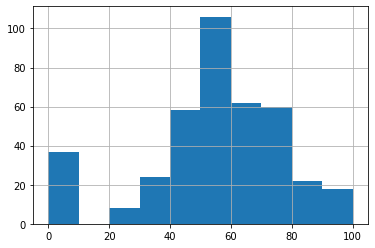

In [ ]:
new_df.score.hist()
new_df.score.describe()

Оценка 0, выглядит как выброс или как отсуствие результата. Может быть ее придется убрать из расчета.

#address

Изучаем колонку adress



In [ ]:
new_df.address.value_counts()

GP    349
MS     46
Name: address, dtype: int64

In [ ]:
new_df.address.value_counts()

new_df.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# sex

F    208
M    187
Name: sex, dtype: int64

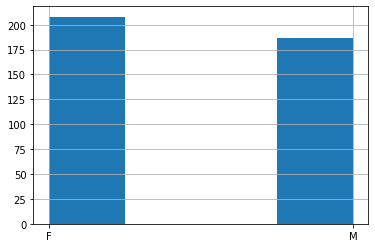

In [ ]:
new_df.sex.hist(bins=4)

new_df.sex.value_counts()

Выбросов нет девочек больше, чем мальчиков.

#age

16.0    104
17.0     98
15.0     82
18.0     82
19.0     24
20.0      3
21.0      1
22.0      1
Name: age, dtype: int64

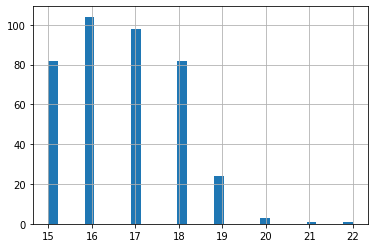

In [ ]:
new_df.age.hist(bins=33)

new_df.age.value_counts()

In [ ]:
new_df.age.value_counts().index[0] #мода

16.0

#famsize


GT3    288
LE3    107
Name: famsize, dtype: int64

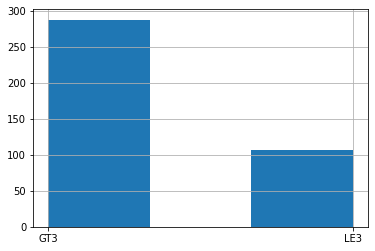

In [ ]:
new_df.famsize.hist(bins=3)

new_df.famsize.value_counts()

Больше учеников из семьи с болеее, чем три человка в семье.

#pstatus

T    359
A     36
Name: pstatus, dtype: int64

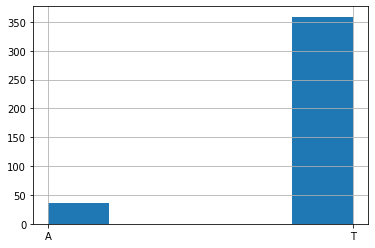

In [ ]:
new_df.pstatus.hist(bins=5)

new_df.pstatus.value_counts()

#medu образование матери

- 0 - нет, 
- 1 - 4 класса, 
- 2 - 5-9 классы, 
- 3 - среднее специальное или 11 классов, 
- 4 - высшее

4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: medu, dtype: int64

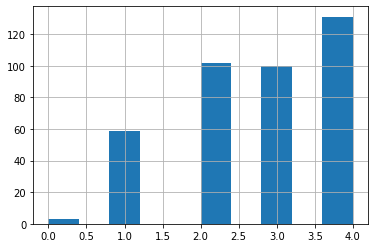

In [ ]:
new_df.medu.hist(bins=10,grid = True)

new_df.medu.value_counts()

#fedu образование отца

- 0 - нет, 
- 1 - 4 класса, 
- 2 - 5-9 классы, 
- 3 - среднее специальное или 11 классов, 
- 4 - высшее


2.0    130
3.0     96
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64

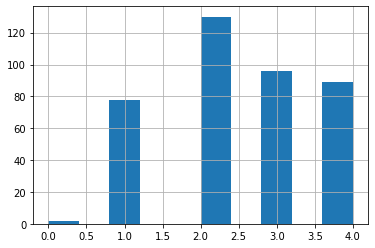

In [ ]:
new_df.fedu.hist(bins=10,grid = True)

new_df.fedu.value_counts()

Наблюдается выброс - значение 40, скорее всего это значение должно быть 4. Заменим его.

In [ ]:
new_df.fedu = new_df.fedu.apply(lambda x: 4.0 if x == 40.0 else x)

#mjob работ матери

other       152
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

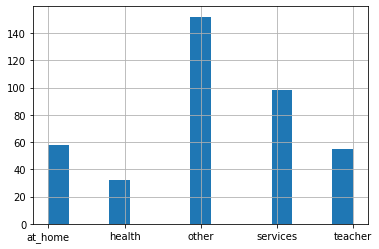

In [ ]:
new_df.mjob.hist(bins=15,grid = True)

new_df.mjob.value_counts()

# fjob работ отца

other       233
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

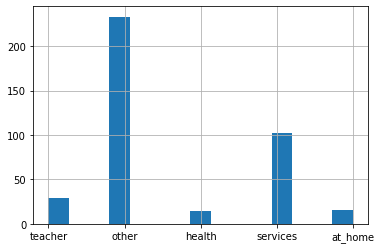

In [ ]:
new_df.fjob.hist(bins=15, grid = True)

new_df.fjob.value_counts()

#reason причина выбора школы

course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64

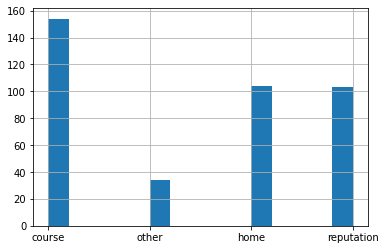

In [ ]:
new_df.reason.hist(bins=15, grid = True)

new_df.reason.value_counts()

#guardian — опекун 

- 'mother' - мать, 
- 'father' - отец, 
- 'other' - другое)

mother    281
father     86
other      28
Name: guardian, dtype: int64

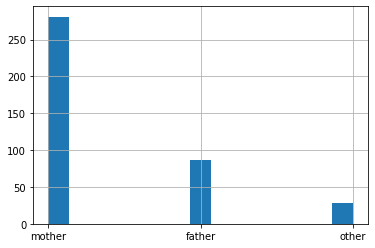

In [ ]:
new_df.guardian.hist(bins=15, grid = True)

new_df.guardian.value_counts()

#traveltime — время в пути до школы 
- 1 - <15 мин., 
- 2 - 15-30 мин., 
- 3 - 30-60 мин., 
- 4 - >60 мин.

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

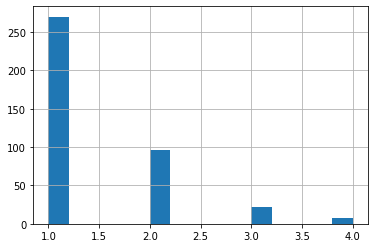

In [ ]:
new_df.traveltime.hist(bins=15, grid = True)

new_df.traveltime.value_counts()

#studytime — время на учёбу помимо школы в неделю 
- 1 - <2 часов, 
- 2 - 2-5 часов, 
- 3 - 5-10 часов, 
- 4 - >10 часов

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

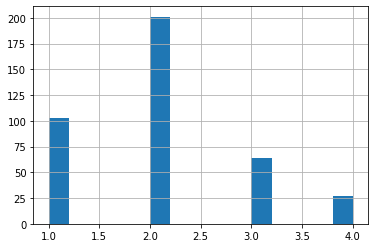

In [ ]:
new_df.studytime.hist(bins=15, grid = True)

new_df.studytime.value_counts()

#failures — количество внеучебных неудач

- n, если 1<=n<=3, 
иначе 0

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

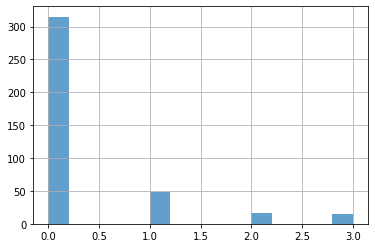

In [ ]:
new_df.failures.hist(bins=15, grid = True, alpha=0.7)

new_df.failures.value_counts()

# schoolsup — дополнительная образовательная поддержка (yes или no)

no     344
yes     51
Name: schoolsup, dtype: int64

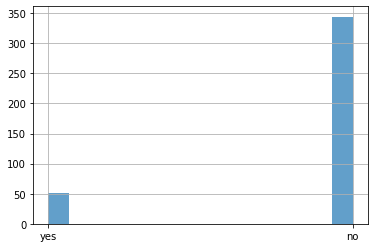

In [ ]:
new_df.schoolsup.hist(bins=15, grid = True, alpha=0.7)

new_df.schoolsup.value_counts()

#famsup — семейная образовательная поддержка (yes или no)

yes    258
no     137
Name: famsup, dtype: int64

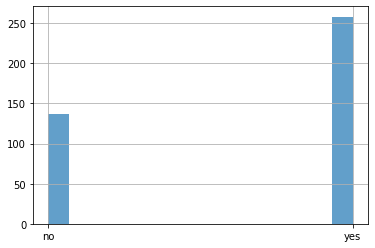

In [ ]:
new_df.famsup.hist(bins=15, grid = True, alpha=0.7)

new_df.famsup.value_counts()

#paid — дополнительные платные занятия по математике (yes или no)

no     240
yes    155
Name: paid, dtype: int64

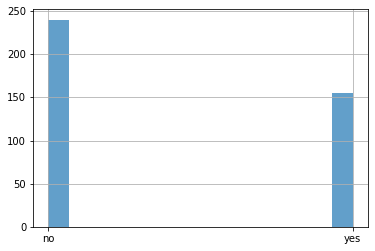

In [ ]:
new_df.paid.hist(bins=15, grid = True, alpha=0.7)

new_df.paid.value_counts()

#activities — дополнительные внеучебные занятия (yes или no)

yes    209
no     186
Name: activities, dtype: int64

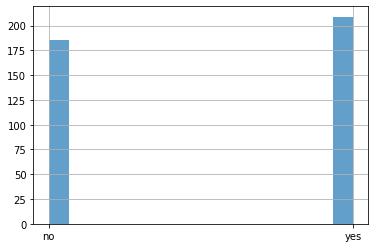

In [ ]:
new_df.activities.hist(bins=15, grid = True, alpha=0.7)

new_df.activities.value_counts()

#nursery — посещал детский сад (yes или no)

yes    316
no      79
Name: nursery, dtype: int64

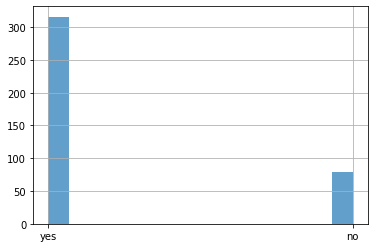

In [ ]:
new_df.nursery.hist(bins=15, grid = True, alpha=0.7)

new_df.nursery.value_counts()

#higher — хочет получить высшее образование (yes или no)

yes    376
no      19
Name: higher, dtype: int64

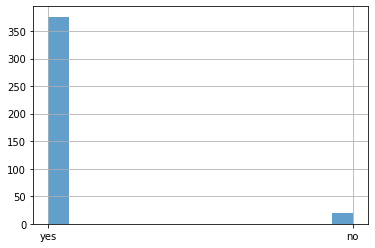

In [ ]:
new_df.higher.hist(bins=15, grid = True, alpha=0.7)

new_df.higher.value_counts()

#internet — наличие интернета дома (yes или no)

yes    376
no      19
Name: higher, dtype: int64

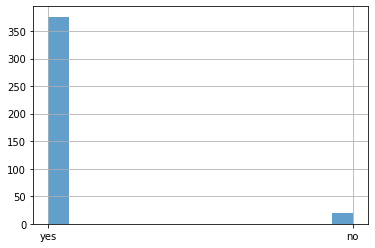

In [ ]:
new_df.higher.hist(bins=15, grid = True, alpha=0.7)

new_df.higher.value_counts()

#romantic — в романтических отношениях (yes или no)

yes    376
no      19
Name: higher, dtype: int64

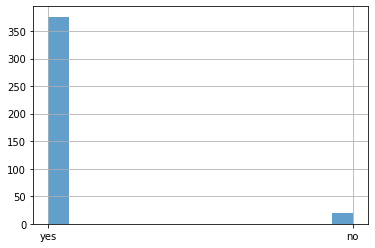

In [ ]:
new_df.higher.hist(bins=15, grid = True, alpha=0.7)

new_df.higher.value_counts()

#famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

 4.0    209
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

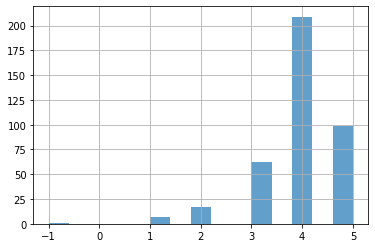

In [ ]:
new_df.famrel.hist(bins=15, grid = True, alpha=0.7)

new_df.famrel.value_counts()

Есть выброс -1, скорее всего это 1

In [ ]:
new_df.famrel = new_df.famrel.apply(lambda x: abs(x) if x < 0 else x) # убрали выброс в колонке famrel
new_df.famrel.value_counts()

4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

#freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

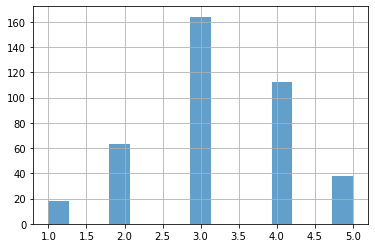

In [ ]:
new_df.freetime.hist(bins=15, grid = True, alpha=0.7)

new_df.freetime.value_counts()

#goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

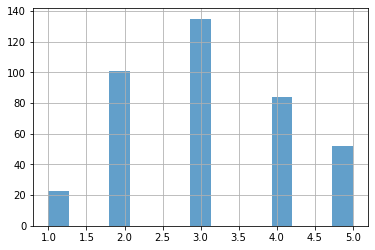

In [ ]:
new_df.goout.hist(bins=15, grid = True, alpha=0.7)

new_df.goout.value_counts()

#health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

5.0    138
3.0     89
4.0     78
1.0     47
2.0     43
Name: health, dtype: int64

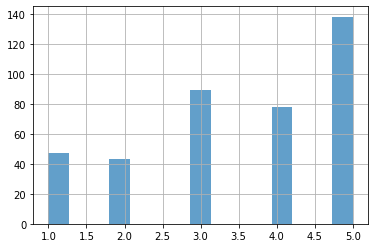

In [ ]:
new_df.health.hist(bins=15, grid = True, alpha=0.7)

new_df.health.value_counts()

#absences — количество пропущенных занятий

0.0     111
4.0      65
2.0      60
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
5.0       5
9.0       3
1.0       3
13.0      2
15.0      2
11.0      2
Name: absences, dtype: int64

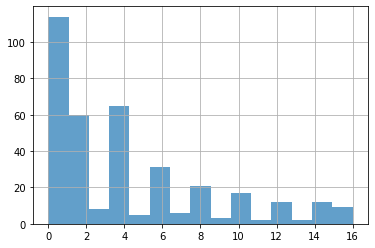

In [ ]:
new_df.absences.hist(bins=15, grid = True, alpha=0.7)

new_df.absences.value_counts()

Не типичное распределение, требует нового изучения

In [ ]:
new_df.absences.describe()

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

судя по всему есть выбросы, надо их убрать.

#Корреляционный аназил

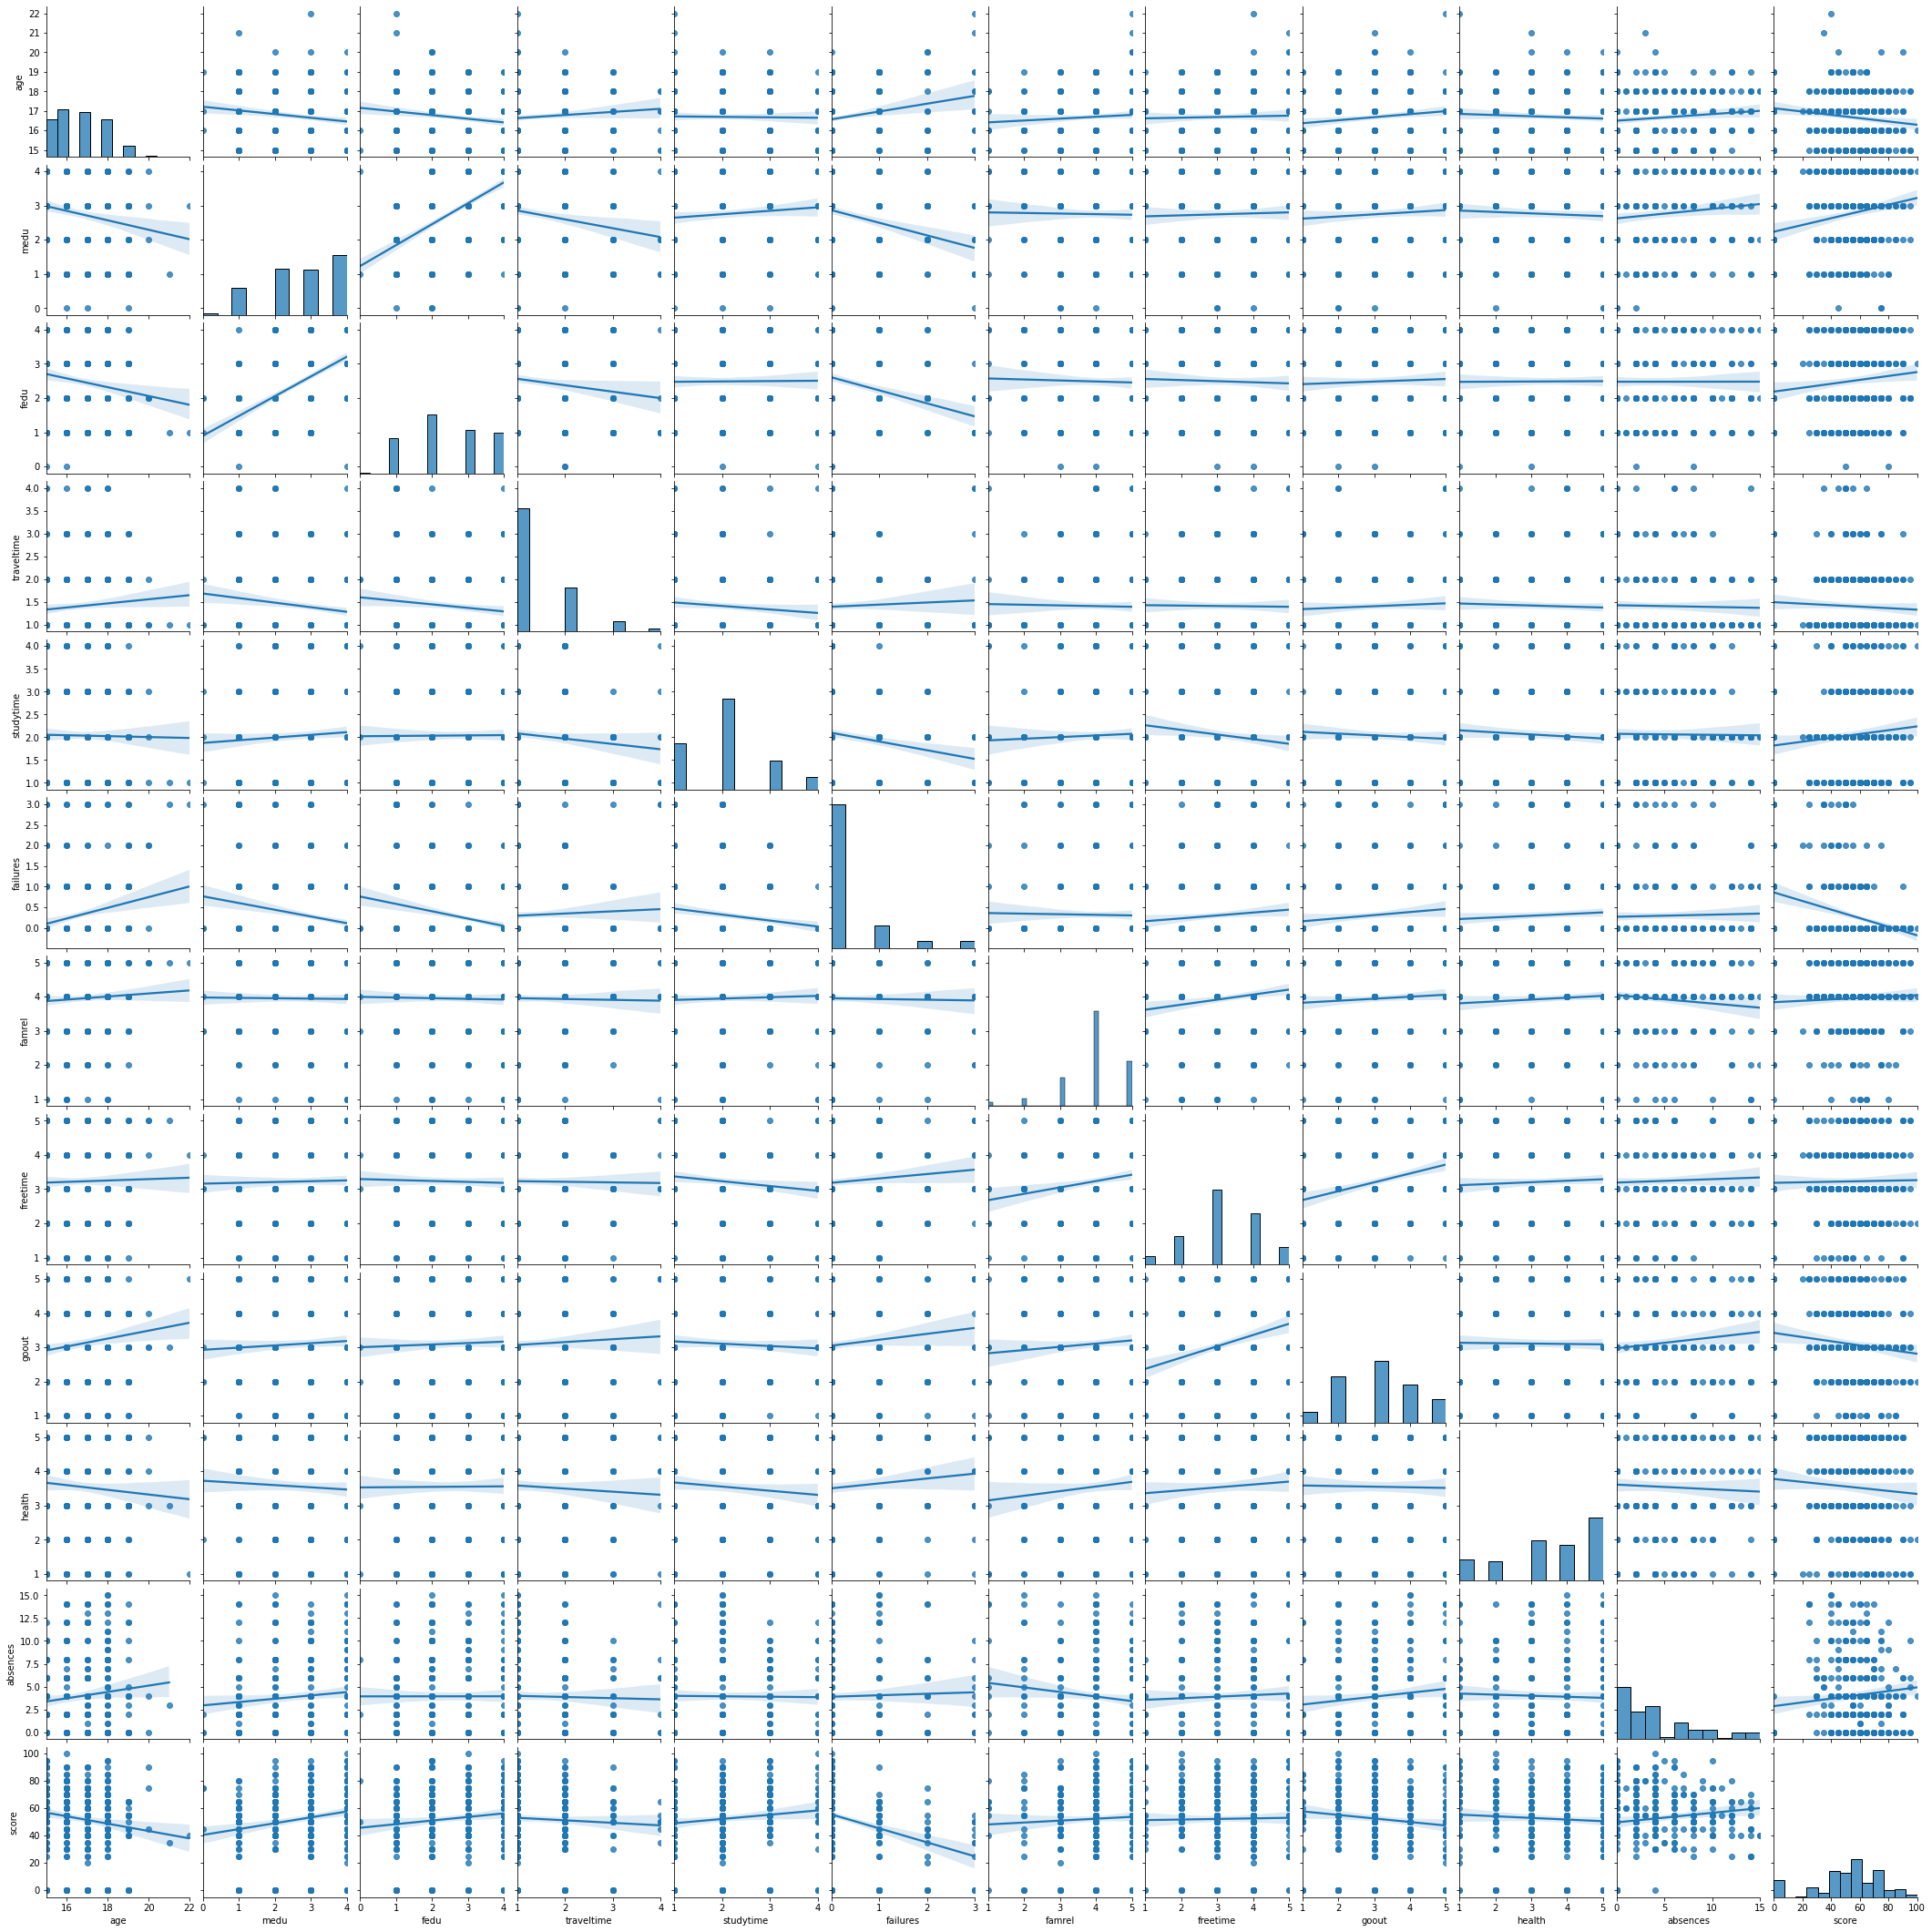

In [ ]:
sns.pairplot(new_df, kind = 'reg')

Матрица корреляций

In [ ]:
new_df.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.154781,0.084755,-0.015355,0.228081,0.065250,0.026443,0.134069,-0.063892,0.148437,-0.151150
medu,-0.161375,1.000000,0.593116,-0.160877,0.077050,-0.245110,-0.013853,0.026210,0.063361,-0.050991,0.065026,0.205568
fedu,-0.154781,0.593116,1.000000,-0.120629,0.007754,-0.260690,-0.024077,-0.029868,0.039084,0.006132,-0.026101,0.122642
traveltime,0.084755,-0.160877,-0.120629,1.000000,-0.094637,0.049670,-0.019040,-0.012496,0.051775,-0.044842,-0.035997,-0.055243
studytime,-0.015355,0.077050,0.007754,-0.094637,1.000000,-0.166598,0.037638,-0.119014,-0.051090,-0.073674,-0.076534,0.114371
failures,0.228081,-0.245110,-0.260690,0.049670,-0.166598,1.000000,-0.017230,0.094826,0.113649,0.075849,0.082667,-0.326532
famrel,0.065250,-0.013853,-0.024077,-0.019040,0.037638,-0.017230,1.000000,0.165324,0.074217,0.085947,-0.083344,0.053510
freetime,0.026443,0.026210,-0.029868,-0.012496,-0.119014,0.094826,0.165324,1.000000,0.292305,0.060557,0.086623,0.018200
goout,0.134069,0.063361,0.039084,0.051775,-0.051090,0.113649,0.074217,0.292305,1.000000,-0.014274,0.105943,-0.125708
health,-0.063892,-0.050991,0.006132,-0.044842,-0.073674,0.075849,0.085947,0.060557,-0.014274,1.000000,-0.015549,-0.072776


В целом значительной корреляции с результатами по математики среди числовых значений не выявлено.

Слабая отрицательная корреляция с количеством неудач.

#Анализ Номинантных переменных

In [10]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=new_df.loc[new_df.loc[:, column].isin(new_df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

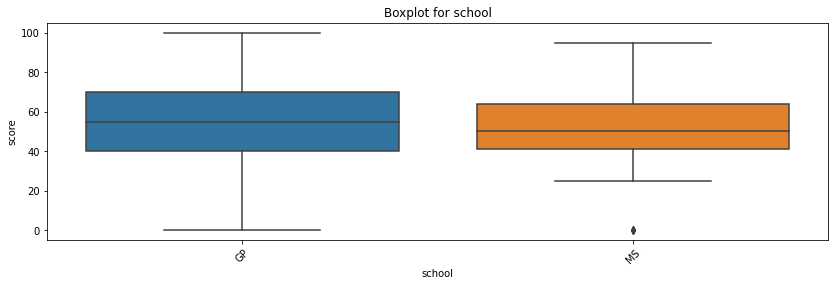

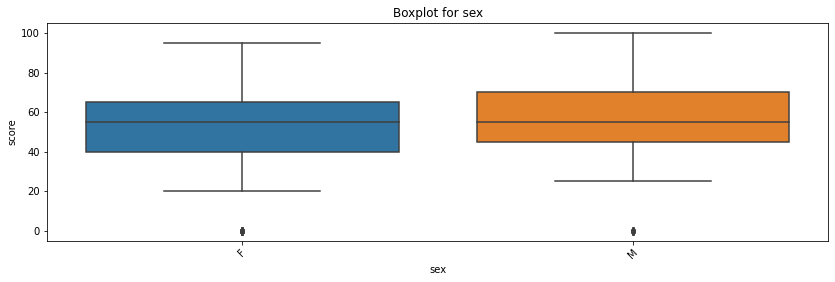

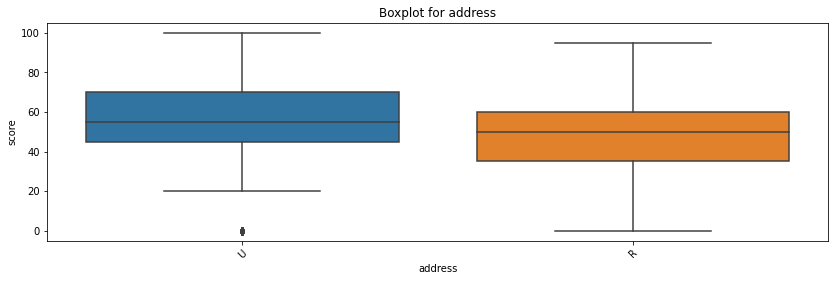

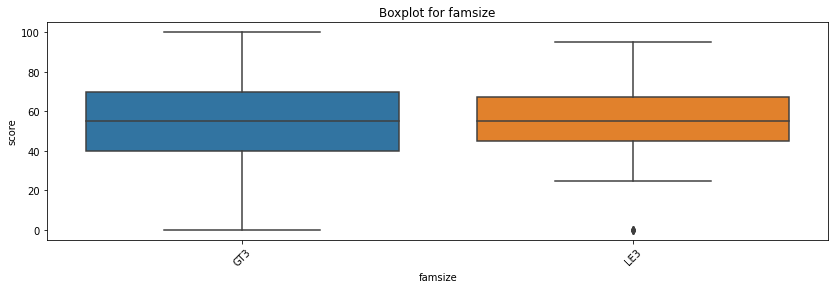

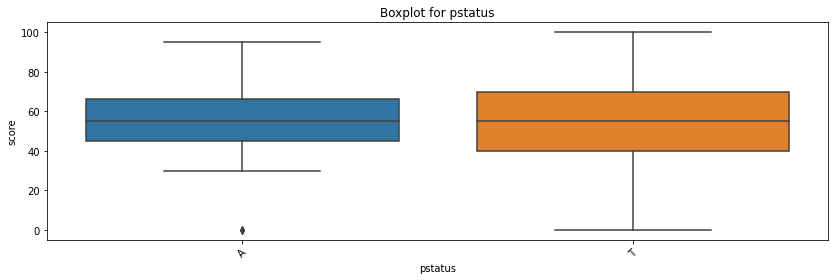

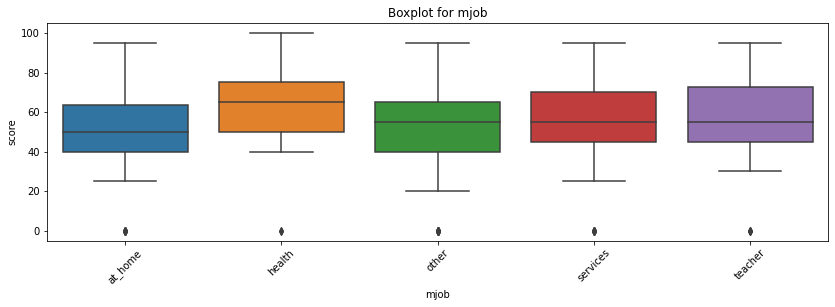

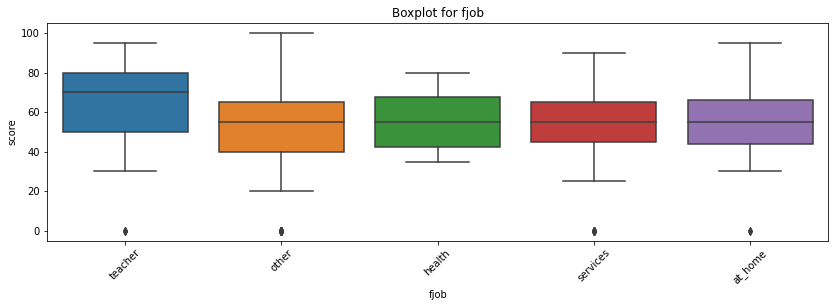

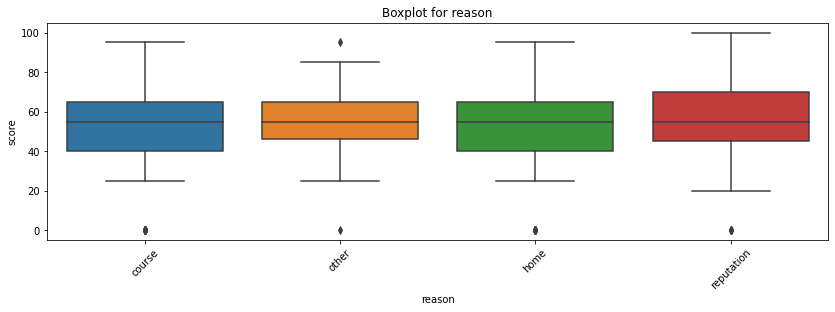

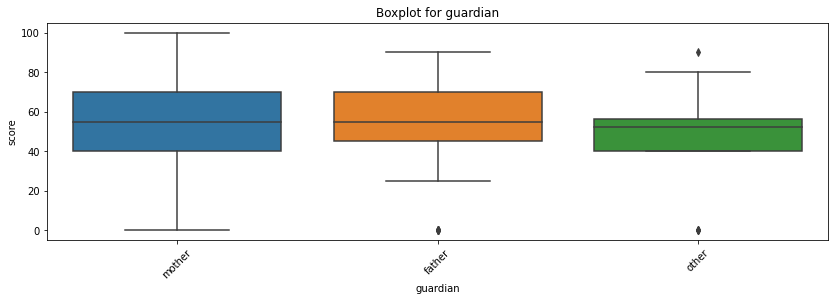

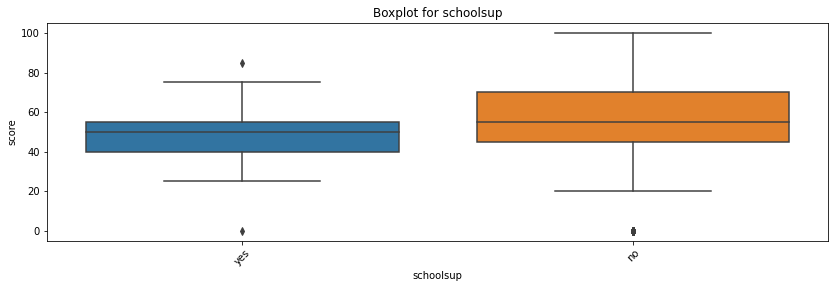

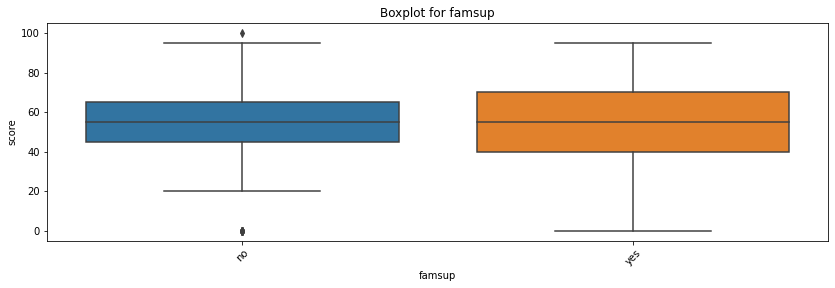

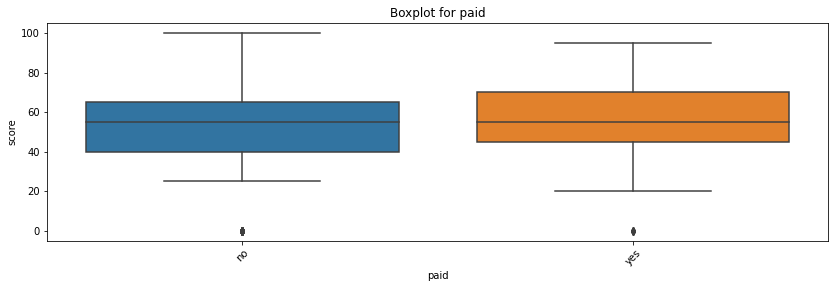

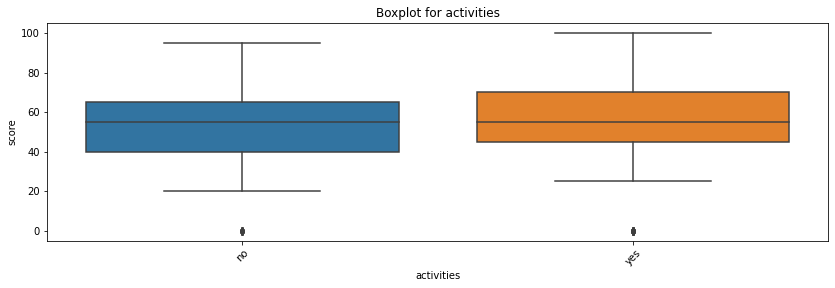

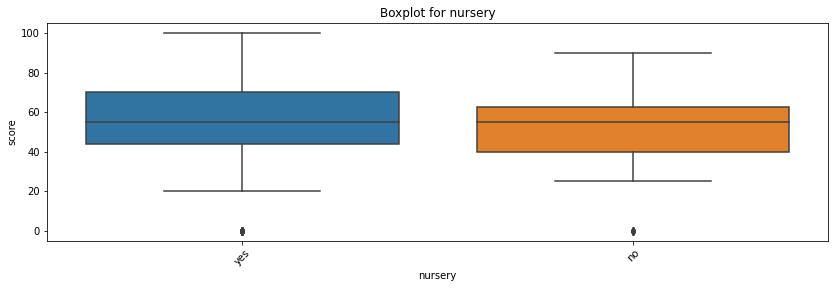

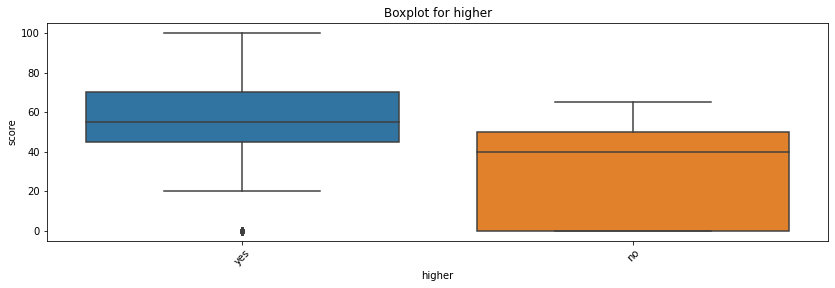

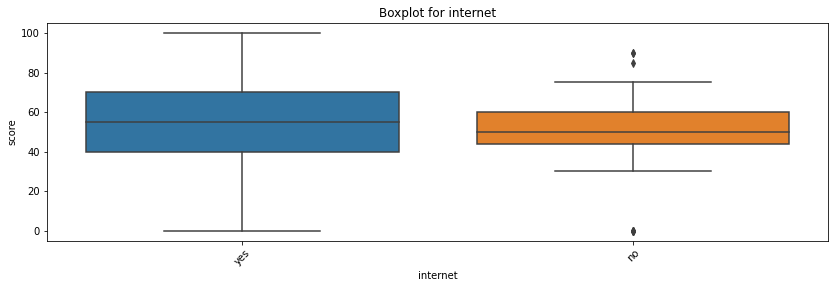

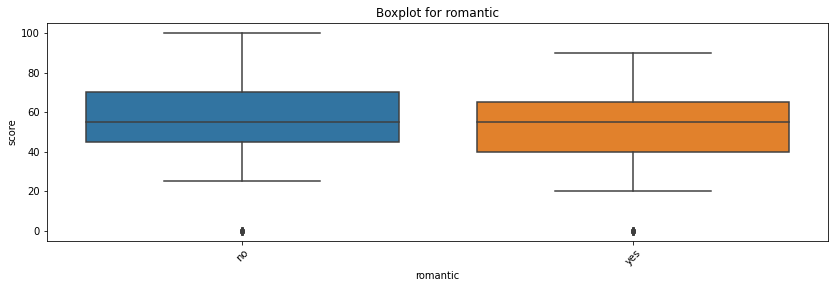

In [11]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
            'reason','guardian', 'schoolsup', 'famsup','paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col), 

Исходя из графиков, можно сделать вывод, что все показатели могут повлиять на результат по математики.

Для подтверждения догадки, необходимо проверить ее при помощи теста Стьюдента.


In [12]:
def get_stat_dif(column):
    cols = new_df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(new_df.loc[new_df.loc[:, column] == comb[0], 'score'], 
                        new_df.loc[new_df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [13]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
            'reason','guardian', 'schoolsup', 'famsup','paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Таким образом статистически значимые позиции, влияющие на результат теста по математике - это адресс проживания, работа матери,стремление к получению высшего образования и наличие романтических отношений.

#Вывод

1. По данным карреляционного анализа и анализа номинативных переменных можно сдеать вывод, что на показатель score влияют следующие параметры:
- medu
- failures
- address
- mjob
- higher
- romantic


2. Данные можно считать достаточно чистыми, тк выбросы были в трех колонках: fedu, famrel и absences.

3. Тем не менее, в данных много пропусков, а самих данных не очень много, поэтому пришлось заменять значения на моду и медиану.

4. Отрицательная корреляция параметра failures показывает, что количество внеучебных неудач сказывается на результаты по математике.

In [15]:
math_score_for_model = new_df.loc[:, ['medu', 'failures', 'address', 'mjob', 'higher', 'romantic' ]]
math_score_for_model.head()


,medu,failures,address,mjob,higher,romantic
0,4.0,0.0,U,at_home,yes,no
1,1.0,0.0,U,at_home,yes,no
2,1.0,3.0,U,at_home,yes,no
3,4.0,0.0,U,health,yes,yes
4,3.0,0.0,U,other,yes,no
